# Проектное задание - анализ таблицы олимписких игр

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [ ]:

olimp = pd.read_csv('olimpic.csv.zip')

region = pd.read_csv('region.csv')


In [ ]:
olimp.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
#
# Слить две таблицы в одну, следующим образом - к olympics добавить два столбца (region, notes), ключевой столбец NOC
df = pd.merge(olimp,region,on='NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [ ]:

# найти количество золотых медалей для зимней, летней и суммарно (в одной таблице)
df1 = df[df['Medal'] == 'Gold']
df1.pivot_table(index = 'Season', values = 'Medal', aggfunc= 'count', margins =True)


,Medal
Season,
Summer,11458
Winter,1913
All,13371


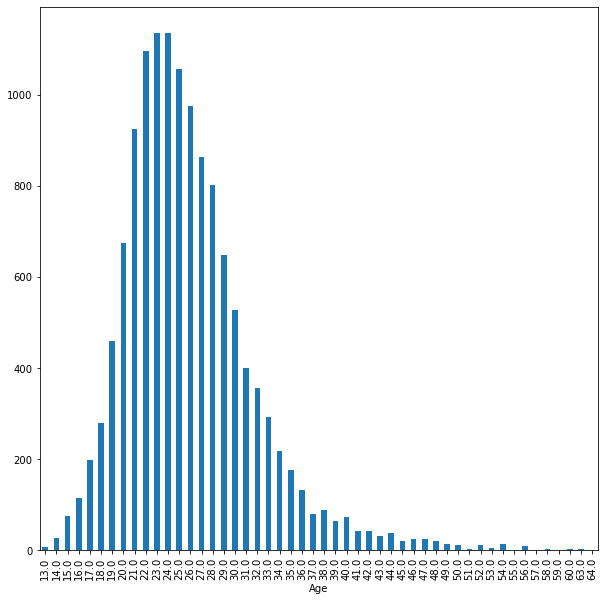

In [ ]:

# построить гистограмму распределения золотых медалистов от их возраста 
# внимание: возраст обязательно целые числа
df1.groupby('Age')['Medal'].size().plot(kind='bar', figsize= (10,10));



In [ ]:
 
# сколько олимпийских ЧЕМПИОНОВ было страше 60 лет (включая 60)
# построить столбцовую гистограмму по видам спорта (Sport) для золотых медалистов старше 60
len(df1[df1['Age'] >=60]) #ответ на первый вопрос


10

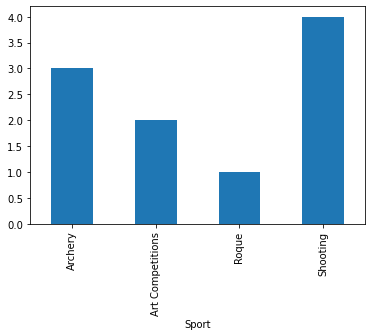

In [ ]:
eld = df1[df1['Age'] >=60]
eld.groupby('Sport').size().plot(kind='bar');

<AxesSubplot:xlabel='Year'>

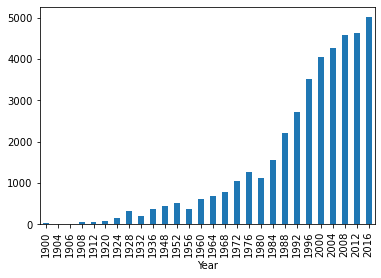

In [ ]:

# построить столбцовый график количества женщин по годам участвовавших в летних олимпиадах по годам
df6 = df[(df['Season'] =='Summer') & (df['Sex'] == 'F')]
df6.groupby('Year')['Name'].nunique().plot(kind='bar')




<ipython-input-11-98335afed160>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['type'] = np.where(df1['Sport']=='Basketball', 'Basketball', 'NonBasketball')


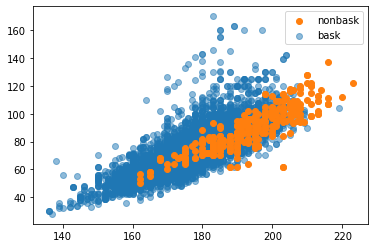

In [ ]:
# 
# в виде точек визуализировать зависимость роста и веса для
# золотых медалистов всех видов спорта и выделить точки для только для Баскетбола (Basketball)
df1['type'] = np.where(df1['Sport']=='Basketball', 'Basketball', 'NonBasketball')
df7_1 = df1[df1['type'] =='Basketball']
df7_2 = df1[df1['type'] =='NonBasketball']
gr2 = plt.scatter(df7_2['Height'],df7_2['Weight'],label = 'nonbask', alpha = 0.5)
gr1=plt.scatter(df7_1['Height'],df7_1['Weight'],label ='bask', alpha = 1)
plt.legend((gr1,gr2), ('nonbask','bask'))
plt.show()




In [ ]:
# 
# создать отдельную таблицу для зимних олимпийских игр с 1956 с 1988 в которой
# перрекодировать медали 'Gold':3 , 'Silver': 2, 'Bronze': 1
#
# 
# найти СПИСОК 6 команд набравщих суммарно больше всех баллов в медальном зачете
#
#
# Найти в каком году и в каком городе было получено больше всего очков странами из данного списка. 
# Результат представить в виде таблицы (номер по порядку, страна из списка 6 стран, год, город, количество баллов). 
# Упорядочить по количеству набранных баллов.




In [ ]:
df8 = df[df['Season'] == 'Winter']

In [ ]:
df8 = df8[(df8['Year']>=1956) & (df8['Year']<=1988)].dropna(subset=['Medal'])
slov = {'Gold':3,'Silver':2,'Bronze':1}
df8['bal'] = df8['Medal'].map(slov)



In [ ]:
grouped = df8.groupby('Team')['bal'].sum().nlargest(6)#ответ на 9
grouped


Team
Soviet Union     927
United States    312
Finland          268
Sweden           262
Norway           232
East Germany     196
Name: bal, dtype: int64

In [ ]:
df10 = df8[df8['Team'].isin(grouped.index)]
df10 = df10[['Team','City', 'Year','bal']]
#df10.groupby(['Team','Year'])['bal'].nlargest(6)
df10.head()


,Team,City,Year,bal
14663,United States,Sapporo,1972,2
14695,United States,Cortina d'Ampezzo,1956,3
14749,United States,Innsbruck,1964,1
14841,United States,Cortina d'Ampezzo,1956,2
14899,United States,Sarajevo,1984,3


In [ ]:
grouped2=df10.groupby(['Team', 'Year', 'City'])['bal'].sum().reset_index()

In [ ]:
grouped2.sort_values(by='bal',ascending=False)

,Team,Year,City,bal
32,Soviet Union,1988,Calgary,130
29,Soviet Union,1976,Innsbruck,123
28,Soviet Union,1972,Sapporo,113
31,Soviet Union,1984,Sarajevo,109
26,Soviet Union,1964,Innsbruck,109
30,Soviet Union,1980,Lake Placid,101
24,Soviet Union,1956,Cortina d'Ampezzo,94
27,Soviet Union,1968,Grenoble,85
48,United States,1980,Lake Placid,82
14,Finland,1988,Calgary,70
